In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from IPython.display import display

In [2]:

data = pd.read_csv('D:\\Hocmay\\advertisite.csv')
display(data)


,TV,Radio,Newspaper,Sales,Sales_Category
0,230.1,37.8,69.2,22.1,Cao
1,44.5,39.3,45.1,10.4,Trung bình
2,17.2,45.9,69.3,9.3,Thấp
3,151.5,41.3,58.5,18.5,Cao
4,180.8,10.8,58.4,12.9,Trung bình
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,Thấp
196,94.2,4.9,8.1,9.7,Thấp
197,177.0,9.3,6.4,12.8,Trung bình
198,283.6,42.0,66.2,25.5,Cao


Tiền xử lý

In [3]:
data.dropna(subset=['TV', 'Radio', 'Newspaper', 'Sales'], inplace=True)

for x in data.index:
    if data.loc[x, "TV"] < 0:
        data.loc[x, "TV"] = np.abs(data.loc[x, "TV"])
        
for x in data.index:
    if data.loc[x, "Radio"] < 0:
        data.loc[x, "Radio"] = np.abs(data.loc[x, "Radio"])

for x in data.index:
    if data.loc[x, "Newspaper"] < 0:
        data.loc[x, "Newspaper"] = np.abs(data.loc[x, "Newspaper"])

for x in data.index:
    if data.loc[x, "Sales"] < 0:
        data.loc[x, "Sales"] = np.abs(data.loc[x, "Sales"])   

data.drop_duplicates(inplace=True)
display(data)


,TV,Radio,Newspaper,Sales,Sales_Category
0,230.1,37.8,69.2,22.1,Cao
1,44.5,39.3,45.1,10.4,Trung bình
2,17.2,45.9,69.3,9.3,Thấp
3,151.5,41.3,58.5,18.5,Cao
4,180.8,10.8,58.4,12.9,Trung bình
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,Thấp
196,94.2,4.9,8.1,9.7,Thấp
197,177.0,9.3,6.4,12.8,Trung bình
198,283.6,42.0,66.2,25.5,Cao


In [46]:
correlation = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Cao'

Lựa chọn đặc trưng

In [47]:
features = ['TV', 'Radio', 'Newspaper'] 
target = 'Sales' 
X = data[features]
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Huấn luyện mô hình Linear

In [48]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

joblib.dump(linear_model, 'linear_model_sales.pkl')
print("Mô hình đã được lưu vào file 'linear_model_sales.pkl'.")


Mô hình đã được lưu vào file 'linear_model_sales.pkl'.


Đánh giá kết quả mô hình Linear

Mô hình đã được tải lại từ file.
Đánh giá trên tập huấn luyện:
R²: 0.8957, RMSE: 1.6447, MAE: 1.1985

Đánh giá trên tập kiểm tra:
R²: 0.8994, RMSE: 1.7816, MAE: 1.4608


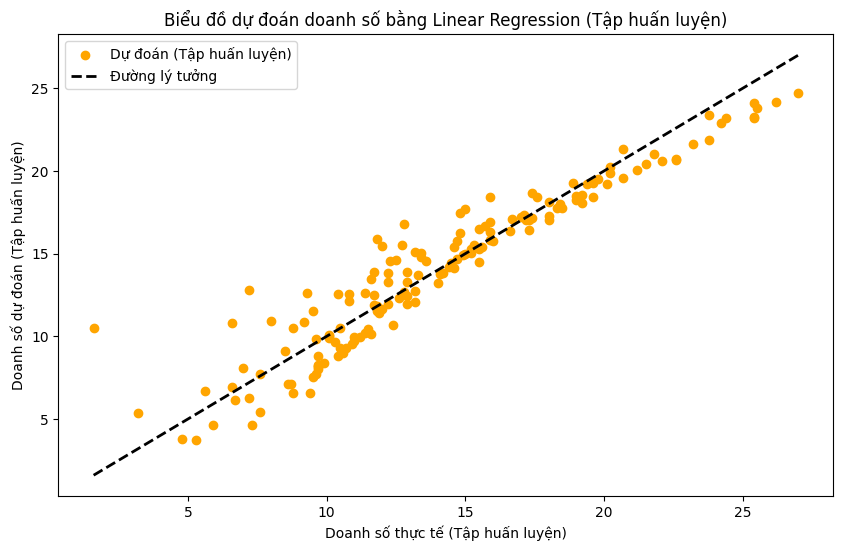

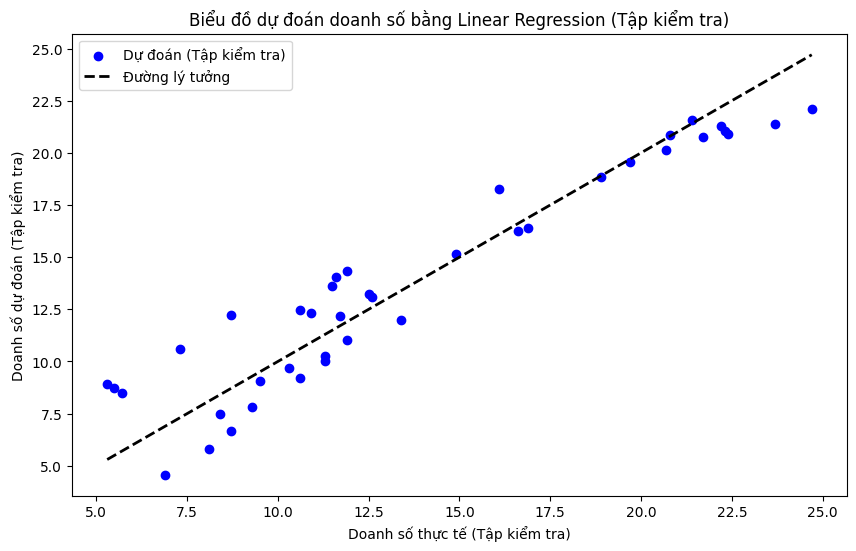

In [49]:
loaded_model = joblib.load('linear_model_sales.pkl')
print("Mô hình đã được tải lại từ file.")

y_train_pred = loaded_model.predict(X_train)
y_test_pred = loaded_model.predict(X_test)

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae

r2_train, rmse_train, mae_train = evaluate_model(y_train, y_train_pred)
r2_test, rmse_test, mae_test = evaluate_model(y_test, y_test_pred)

print("Đánh giá trên tập huấn luyện:")
print(f"R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}")
print("\nĐánh giá trên tập kiểm tra:")
print(f"R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='orange', label='Dự đoán (Tập huấn luyện)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Đường lý tưởng')
plt.xlabel('Doanh số thực tế (Tập huấn luyện)')
plt.ylabel('Doanh số dự đoán (Tập huấn luyện)')
plt.title('Biểu đồ dự đoán doanh số bằng Linear Regression (Tập huấn luyện)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Dự đoán (Tập kiểm tra)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Đường lý tưởng')
plt.xlabel('Doanh số thực tế (Tập kiểm tra)')
plt.ylabel('Doanh số dự đoán (Tập kiểm tra)')
plt.title('Biểu đồ dự đoán doanh số bằng Linear Regression (Tập kiểm tra)')
plt.legend()
plt.show()


Huấn luyện mô hình Ridge

In [50]:
alpha = 0.1 
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)

joblib.dump(ridge_model, 'ridge_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Đánh giá kết quả mô hình Ridge

Đánh giá mô hình trên tập huấn luyện:
R²: 0.8957, RMSE: 1.6447, MAE: 1.1985

Đánh giá mô hình trên tập kiểm tra:
R²: 0.8994, RMSE: 1.7822, MAE: 1.4611


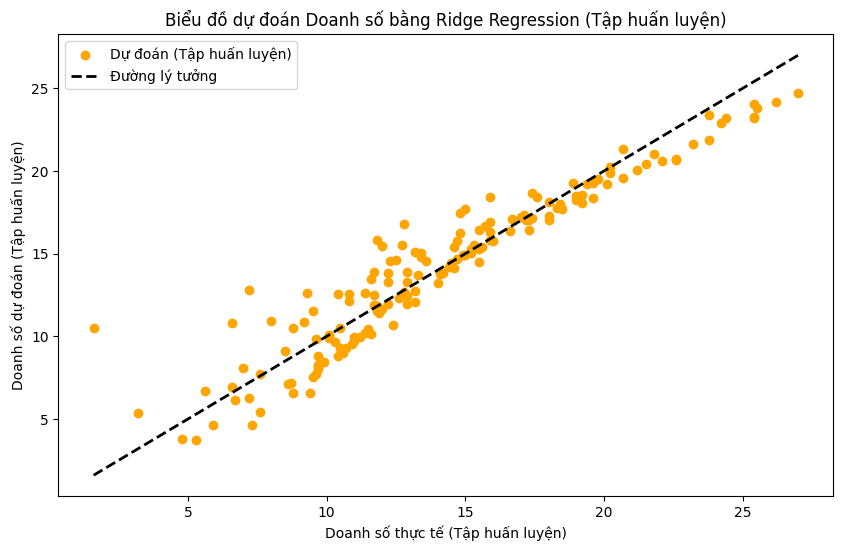

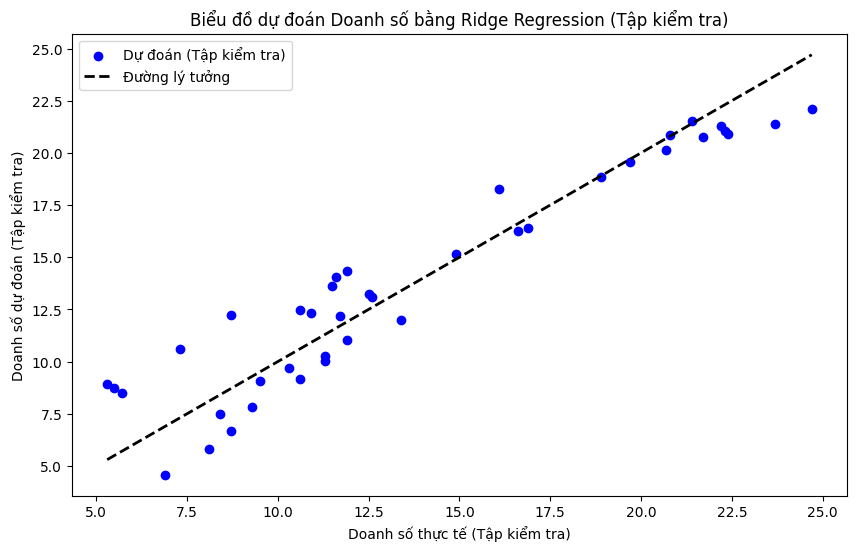

In [51]:
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Đánh giá mô hình trên tập huấn luyện:")
print(f"R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}")

print("\nĐánh giá mô hình trên tập kiểm tra:")
print(f"R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='orange', label='Dự đoán (Tập huấn luyện)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Đường lý tưởng')
plt.xlabel('Doanh số thực tế (Tập huấn luyện)')
plt.ylabel('Doanh số dự đoán (Tập huấn luyện)')
plt.title('Biểu đồ dự đoán Doanh số bằng Ridge Regression (Tập huấn luyện)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Dự đoán (Tập kiểm tra)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Đường lý tưởng')
plt.xlabel('Doanh số thực tế (Tập kiểm tra)')
plt.ylabel('Doanh số dự đoán (Tập kiểm tra)')
plt.title('Biểu đồ dự đoán Doanh số bằng Ridge Regression (Tập kiểm tra)')
plt.legend()
plt.show()



Huấn luyện mô hình Neural Network

In [52]:
neural_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

neural_model.fit(X_train, y_train)

joblib.dump(neural_model, 'neural_model_sales.pkl')
print("Mô hình đã được lưu vào file 'neural_model_sales.pkl'.")


Mô hình đã được lưu vào file 'neural_model_sales.pkl'.


c:\Users\quang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Đánh giá kết quả mô hình Neural Network

Mô hình đã được tải lại từ file.
Đánh giá trên tập huấn luyện:
R²: 0.9924, RMSE: 0.4454, MAE: 0.2917

Đánh giá trên tập kiểm tra:
R²: 0.9874, RMSE: 0.6296, MAE: 0.4209


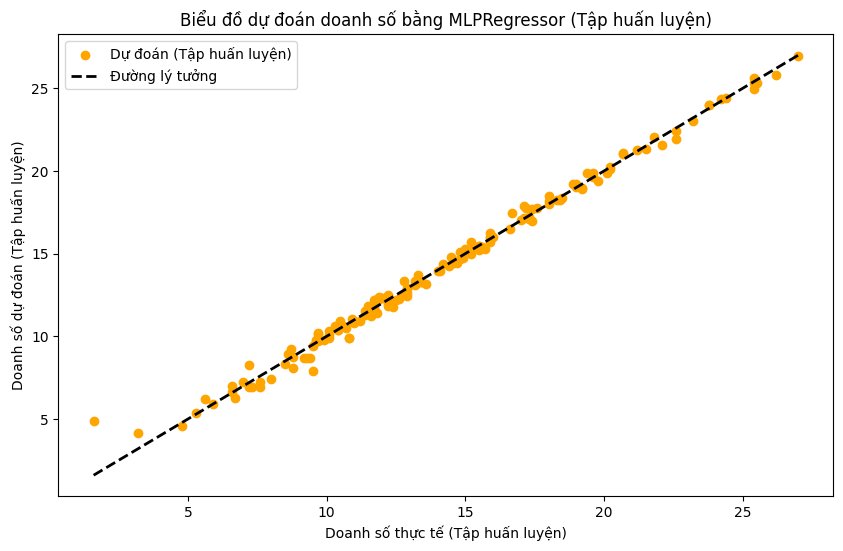

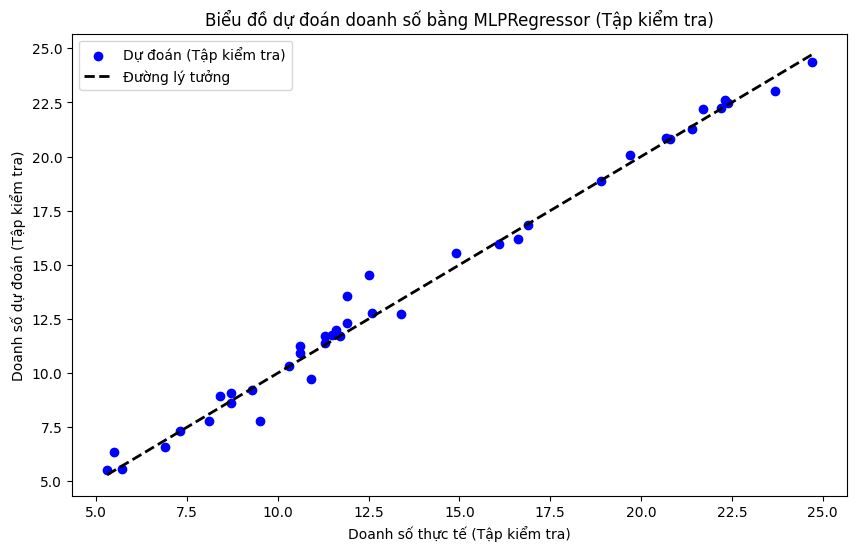

In [53]:
loaded_model = joblib.load('neural_model_sales.pkl')
print("Mô hình đã được tải lại từ file.")

y_train_pred = loaded_model.predict(X_train)

y_test_pred = loaded_model.predict(X_test)

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae

r2_train, rmse_train, mae_train = evaluate_model(y_train, y_train_pred)
r2_test, rmse_test, mae_test = evaluate_model(y_test, y_test_pred)

print("Đánh giá trên tập huấn luyện:")
print(f"R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}")
print("\nĐánh giá trên tập kiểm tra:")
print(f"R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='orange', label='Dự đoán (Tập huấn luyện)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Đường lý tưởng')
plt.xlabel('Doanh số thực tế (Tập huấn luyện)')
plt.ylabel('Doanh số dự đoán (Tập huấn luyện)')
plt.title('Biểu đồ dự đoán doanh số bằng MLPRegressor (Tập huấn luyện)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Dự đoán (Tập kiểm tra)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Đường lý tưởng')
plt.xlabel('Doanh số thực tế (Tập kiểm tra)')
plt.ylabel('Doanh số dự đoán (Tập kiểm tra)')
plt.title('Biểu đồ dự đoán doanh số bằng MLPRegressor (Tập kiểm tra)')
plt.legend()
plt.show()

Huấn luyện mô hình Stacking

In [54]:
linear_model = joblib.load('linear_model_sales.pkl')
ridge_model = joblib.load('ridge_model.pkl')
neural_model = joblib.load('neural_model_sales.pkl')

estimators = [
    ('linear', linear_model),
    ('ridge', ridge_model),
    ('mlp', neural_model)
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())

stacking_model.fit(X_train, y_train)

joblib.dump(stacking_model, 'stacking_model.pkl')
print("Mô hình Stacking đã được lưu.")

c:\Users\quang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\quang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\quang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\quang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

Mô hình Stacking đã được lưu.


Đánh giá kết quả mô hình Stacking

Đánh giá mô hình trên tập huấn luyện:
R²: 0.9923, RMSE: 0.4460, MAE: 0.2917

Đánh giá mô hình trên tập kiểm tra:
R²: 0.9874, RMSE: 0.6306, MAE: 0.4217


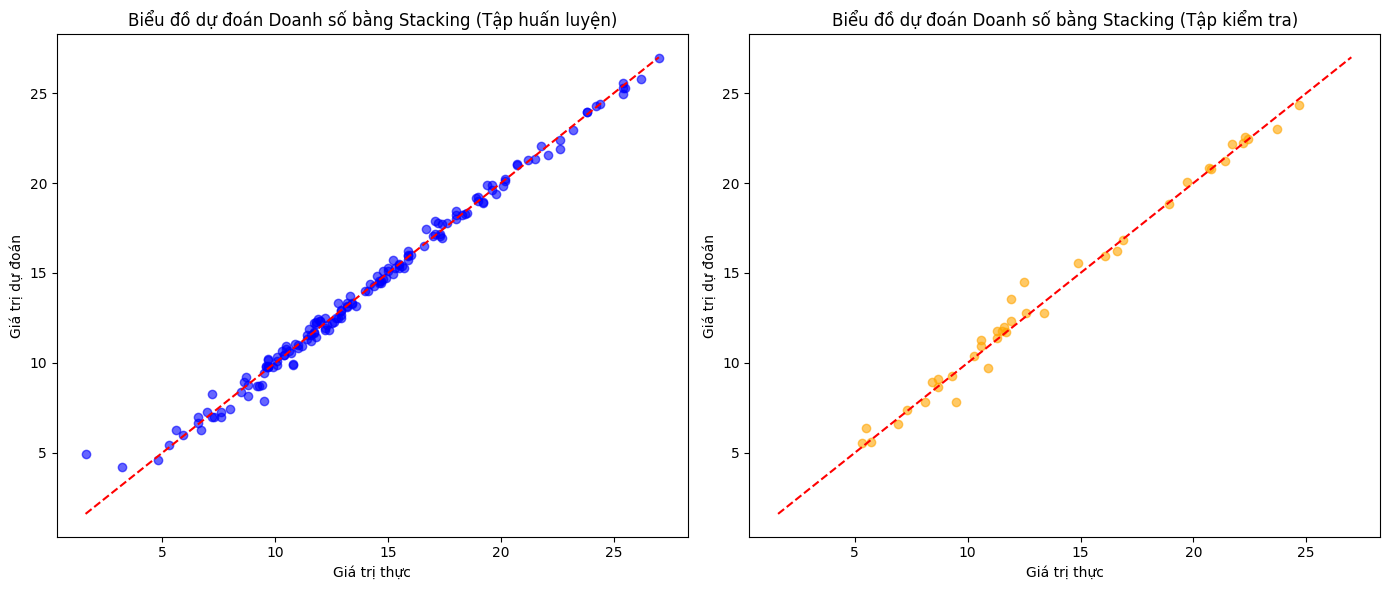

In [55]:
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Đánh giá mô hình trên tập huấn luyện:")
print(f"R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}")

print("\nĐánh giá mô hình trên tập kiểm tra:")
print(f"R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Biểu đồ dự đoán Doanh số bằng Stacking (Tập huấn luyện)')
plt.xlabel('Giá trị thực')
plt.ylabel('Giá trị dự đoán')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='orange', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Biểu đồ dự đoán Doanh số bằng Stacking (Tập kiểm tra)')
plt.xlabel('Giá trị thực')
plt.ylabel('Giá trị dự đoán')

plt.tight_layout()
plt.show()

,Model,R²,RMSE,MAE
0,Linear,0.899438,1.781600,1.460757
1,Ridge,0.899375,1.782162,1.461121
2,Neural,0.987440,0.629626,0.420917
3,Stacking,0.987401,0.630613,0.421657


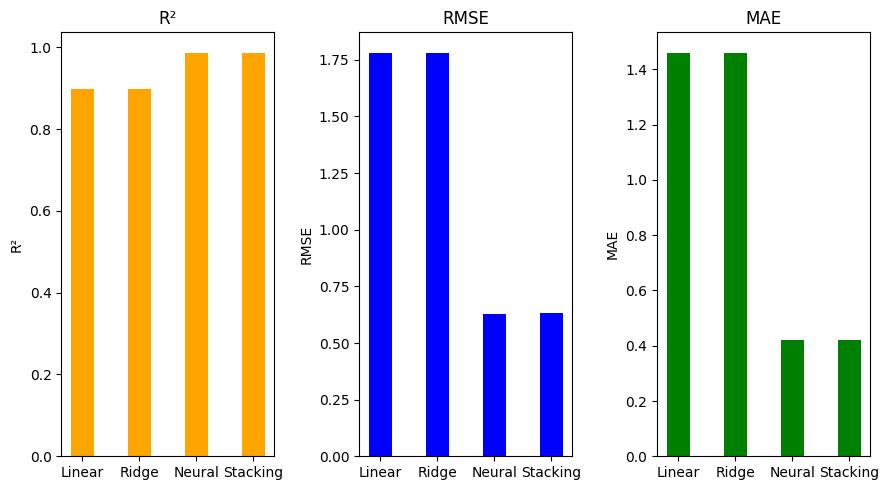

In [56]:
results_test = {
    'Model': ['Linear', 'Ridge', 'Neural', 'Stacking'],
    'R²': [r2_score(y_test, linear_model.predict(X_test)),
                r2_score(y_test, ridge_model.predict(X_test)),
                r2_score(y_test, neural_model.predict(X_test)),
                r2_score(y_test, stacking_model.predict(X_test))],
    'RMSE': [np.sqrt(mean_squared_error(y_test, linear_model.predict(X_test))),
                  np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))),
                  np.sqrt(mean_squared_error(y_test, neural_model.predict(X_test))),
                  np.sqrt(mean_squared_error(y_test, stacking_model.predict(X_test)))],
    'MAE': [mean_absolute_error(y_test, linear_model.predict(X_test)),
                 mean_absolute_error(y_test, ridge_model.predict(X_test)),
                 mean_absolute_error(y_test, neural_model.predict(X_test)),
                 mean_absolute_error(y_test, stacking_model.predict(X_test))]
}

results_test_df = pd.DataFrame(results_test)

display(results_test_df)

fig, axs = plt.subplots(1, 3, figsize=(9, 5))

bar_width = 0.4

axs[0].bar(results_test['Model'], results_test['R²'], color='orange', width=bar_width)
axs[0].set_title('R²')
axs[0].set_ylabel('R²')

axs[1].bar(results_test['Model'], results_test['RMSE'], color='blue', width=bar_width)
axs[1].set_title('RMSE')
axs[1].set_ylabel('RMSE')

axs[2].bar(results_test['Model'], results_test['MAE'], color='green', width=bar_width)
axs[2].set_title('MAE')
axs[2].set_ylabel('MAE')

plt.tight_layout()
plt.show()
